# Fundamentals of Software Systems (FSS) 03SMMINF4569 {-}
**Software Evolution – Part 02 Assignment**

## Submission Guidelines {-}

To correctly complete this assignment you must:

* Carry out the assignment in a team of 2 to 4 students.
* Carry out the assignment with your team only. You are allowed to discuss solutions with other teams, but each team should come up its own personal solution. A strict plagiarism policy is going to be applied to all the artifacts submitted for evaluation.
* As your submission, upload the filled Jupyter Notebook (including outputs) together with the d3 visualization web pages (i.e. upload everything you downloaded including the filled Jupyter Notebook plus your `output.json`)
* The files must be uploaded to OLAT as a single ZIP (`.zip`) file by Dec 13, 2021 @ 23:55.


## Group Members {-}
* Tobias, Boner, 17-707-878
* Calvin, Falter, 17-708-934
* Oliver, Kamer, 16-921-009
* Bulin, Shaqiri, 17-701-442

**Global setup**

In [1]:
# Imports
from tempfile import TemporaryDirectory
from git import Repo
from pydriller import Git, Repository
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
from collections import Counter
from datetime import datetime
import os

# Matplotlib setup
# set_matplotlib_formats("png", "pdf")
# plt.rcParams["text.usetex"] = True
# plt.rcParams["font.family"] = "serif"
# plt.rcParams["font.serif"] = ["Computer Modern"]

## Task Context {-}

In this assigment we will be analyzing the _elasticsearch_ project. All following tasks should be done with the subset of commits from tag `v1.0.0` to tag `v1.1.0`.

Website: <https://github.com/elastic/elasticsearch>

Repository: <https://github.com/elastic/elasticsearch.git>

In [2]:
from_tag = "v1.0.0"
to_tag = "v1.1.0"


repo_path = "./elasticsearch"

# Clone `elasticsearch` into temporary folder and store pydriller object
if not os.path.exists("elasticsearch"):
    Repo.clone_from("https://github.com/elastic/elasticsearch", repo_path)


ipfs_repo = Git(repo_path)

In [3]:
from enum import Enum


class Modification(Enum):
    ADDED = "Lines added"
    REMOVED = "Lines removed"
    TOTAL = "Lines added + lines removed"
    DIFF = "Lines added - lines removed"

## Task 1: Author analysis {-}

In the following, please consider only `java` files.

The first task is to get an overview of the author ownership of the _elasticsearch_ project. In particular, we want to understand who are the main authors in the system between the two considered tags, the authors distribution among files and the files distribution among authors. To this aim, perform the following:

In [4]:
repo = Repository(repo_path, order="date-order", from_tag=from_tag, to_tag=to_tag)

- create a dictionary (or a list of tuples) with the pairs author => number of modified files

In [5]:
author_files_dict = {}

for commit in repo.traverse_commits():
    author = commit.author.email
    files = [
        x.new_path if x.new_path else x.old_path
        for x in commit.modified_files
        if (x.old_path and x.old_path.endswith(".java"))
        or (x.new_path and x.new_path.endswith(".java"))
    ]
    if author in author_files_dict:
        author_files_dict[author].update(files)
    elif len(files) > 0:
        author_files_dict[author] = set(files)

In [6]:
author_number_mod_files = dict((k, len(v)) for (k, v) in author_files_dict.items())
author_number_mod_files

{'simonw@apache.org': 146,
 'lee@writequit.org': 68,
 'jpountz@gmail.com': 162,
 'martijn.v.groningen@gmail.com': 166,
 'uboness@gmail.com': 108,
 'cavannaluca@gmail.com': 222,
 'knutwalker@gmail.com': 1,
 'nik9000@gmail.com': 23,
 'andrew@raines.me': 13,
 'kimchy@gmail.com': 79,
 'david@pilato.fr': 47,
 'alexander@reelsen.net': 27,
 'igor@motovs.org': 59,
 'mconlin@endgame.com': 2,
 'george@george-stathis.com': 6,
 'markharwood@gmail.com': 22,
 'tstibbs@users.noreply.github.com': 3,
 'brian-from-fl@gmail.com': 2,
 'britta.weber@elasticsearch.com': 9,
 'cvisinescu@xebia.com': 2,
 'jmodi@netuitive.com': 2,
 'isabel.drostfromm@elasticsearch.com': 10,
 'francis@gatech.edu': 1,
 'benjamin.deveze@gmail.com': 5,
 'b.leskes@gmail.com': 31,
 'holger.hoffstaette@elasticsearch.com': 16,
 'dawid.weiss@carrotsearch.com': 6,
 'kevin807359@gmail.com': 2,
 'costin.leau@gmail.com': 11,
 'zacharyjtong@gmail.com': 29,
 'me@thanod.nl': 1,
 'holger.hoffstaette@googlemail.com': 4,
 'james_brook@yahoo.co.uk

- create a dictionary (or a list of tuples) with the pairs file => number of authors who modified the file

In [7]:
file_author_dict = {}

for commit in repo.traverse_commits():
    author = commit.author.email
    files = [
        x.new_path if x.new_path else x.old_path
        for x in commit.modified_files
        if (x.old_path and x.old_path.endswith(".java"))
        or (x.new_path and x.new_path.endswith(".java"))
    ]
    for file in files:
        if file in file_author_dict:
            file_author_dict[file].add(author)
        elif len(files) > 0:
            file_author_dict[file] = {author}

In [8]:
file_number_mod_authors = dict((k, len(v)) for (k, v) in file_author_dict.items())
dict((k, v) for (k, v) in file_number_mod_authors.items() if v > 3)

{'src/main/java/org/elasticsearch/percolator/PercolateContext.java': 6,
 'src/main/java/org/elasticsearch/search/internal/DefaultSearchContext.java': 5,
 'src/main/java/org/elasticsearch/search/internal/SearchContext.java': 4,
 'src/test/java/org/elasticsearch/index/search/child/TestSearchContext.java': 4,
 'src/test/java/org/elasticsearch/search/query/SimpleQueryTests.java': 4,
 'src/test/java/org/elasticsearch/search/aggregations/bucket/GeoHashGridTests.java': 4,
 'src/test/java/org/elasticsearch/test/TestCluster.java': 6,
 'src/main/java/org/elasticsearch/percolator/PercolatorService.java': 4,
 'src/test/java/org/elasticsearch/percolator/PercolatorTests.java': 4,
 'src/main/java/org/elasticsearch/index/engine/internal/InternalEngine.java': 5,
 'src/test/java/org/elasticsearch/search/aggregations/RandomTests.java': 4,
 'src/main/java/org/elasticsearch/rest/action/RestActionModule.java': 5,
 'src/main/java/org/elasticsearch/index/mapper/geo/GeoPointFieldMapper.java': 4,
 'src/main/jav

- visualize the distribution of authors among files: the visualization should have on the x axis the number of authors per file (from 1 to max), and on the y axis the number of files with the given number of authors (so for example the first bar represent the number of files with single author)

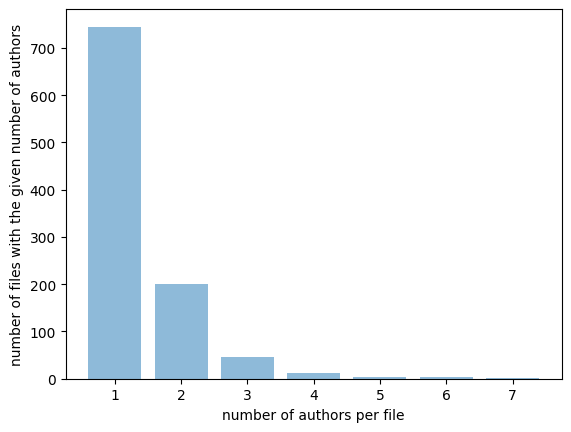

In [9]:
author_changes = file_number_mod_authors.values()
counts = Counter(author_changes)

x_values = range(1, max(counts.keys()) + 1)
y_values = [counts[x] for x in x_values]

plt.bar(x_values, y_values, align="center", alpha=0.5)
plt.ylabel("number of files with the given number of authors")
plt.xlabel("number of authors per file")
plt.show()

- visualize the distribution of files among authors: the visualization should have on the x axis the number of files per author (from 1 to max), and on the y axis the number of authors that own the given number of files (so for example the first bar represent the minor contributors, i.e., the number of authors who own 1 file)

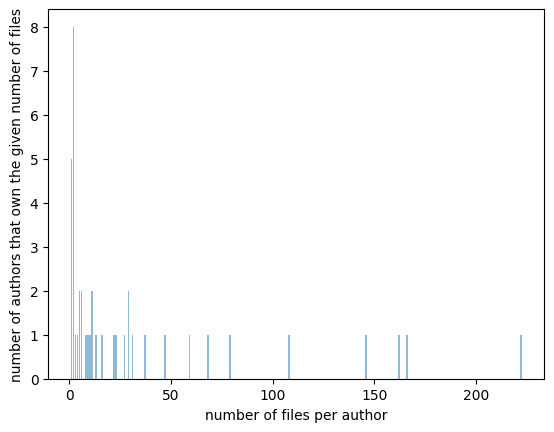

In [10]:
file_changes = author_number_mod_files.values()
counts = Counter(file_changes)

x_values = range(1, max(counts.keys()) + 1)
y_values = [counts[x] for x in x_values]

plt.bar(x_values, y_values, align="center", alpha=0.5)
plt.ylabel("number of authors that own the given number of files")
plt.xlabel("number of files per author")
plt.show()

Comment the two distribution visualizations.

**Answer:**
Most files are only edited by one person. And as the number of authors per file increases, there are fewer files that match the criteria.
Most files only have one author. Very few files have a high number of authors.

Now, let's look at the following 3 packages in more detail:

1. `src/main/java/org/elasticsearch/search`
2. `src/main/java/org/elasticsearch/index`
3. `src/main/java/org/elasticsearch/action`

In [11]:
packages = [
    "src/main/java/org/elasticsearch/search",
    "src/main/java/org/elasticsearch/index",
    "src/main/java/org/elasticsearch/action",
]

Create a function that, given the path of a package and a modification type (see class Modification above), returns a dictionary of authors => number, where the number counts the total lines added or removed or added+removed or added-removed (depending on the given Modification parameter), for the given package. To compute the value at the package level, you should aggregate the data per file.

In [12]:
def get_author_modifications(path, modification_type):
    author_changes_dict = {}
    for commit in repo.traverse_commits():
        for file in commit.modified_files:
            if (file.old_path and file.old_path.startswith(path)) or (
                file.new_path and file.new_path.startswith(path)
            ):
                author = commit.author.email
                changes = (
                    file.added_lines
                    if modification_type == Modification.ADDED
                    else file.deleted_lines
                    if modification_type == Modification.REMOVED
                    else file.added_lines + file.deleted_lines
                    if modification_type == Modification.TOTAL
                    else file.added_lines - file.deleted_lines
                    if modification_type == Modification.DIFF
                    else 0
                )
                if author in author_changes_dict:
                    author_changes_dict[author] += changes
                else:
                    author_changes_dict[author] = changes
    return author_changes_dict

Using the function defined above, visualize the author contributions (lines added + lines removed). The visualization should have the author on the x axis, and the total lines on the y axis. Sort the visualization in decreasing amount of contributions, i.e., the main author should be the first.

In [13]:
author_contributions = [
    get_author_modifications(path, Modification.TOTAL) for path in packages
]

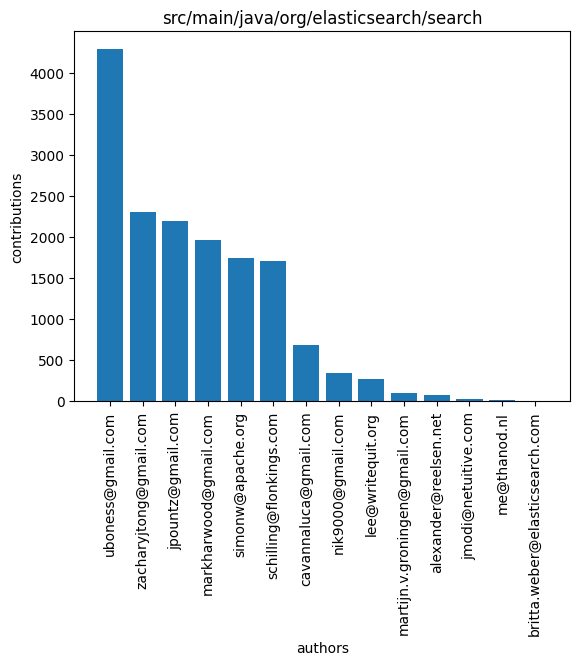

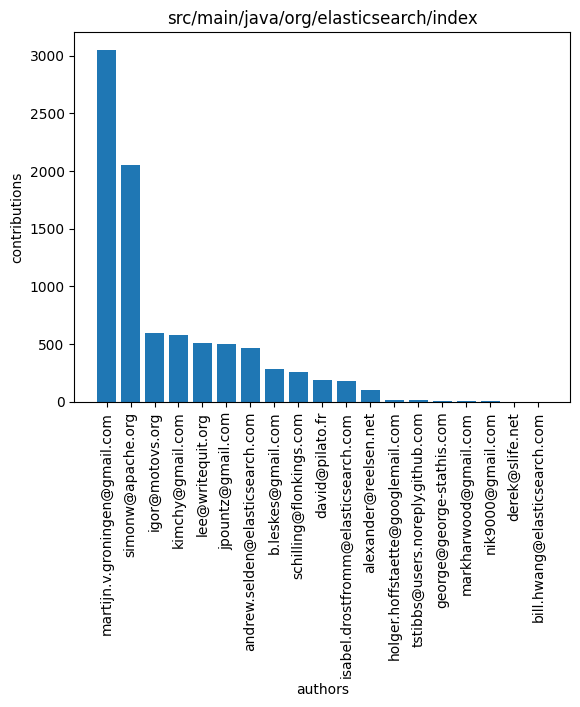

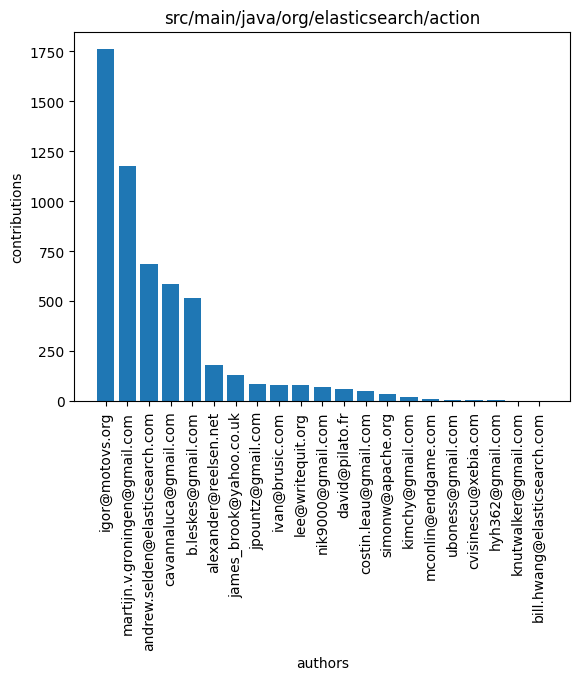

In [14]:
for i, file in enumerate(packages):
    packages_contributions = [
        {"email": k, "contributions": v} for (k, v) in author_contributions[i].items()
    ]

    packages_contributions.sort(key=lambda x: x["contributions"], reverse=True)

    plt.bar(
        [x["email"] for x in packages_contributions],
        [x["contributions"] for x in packages_contributions],
    )
    plt.title(file)
    plt.tick_params("x", rotation=90)
    plt.xlabel("authors")
    plt.ylabel("contributions")
    plt.show()

Compare the visualization for the 3 packages and comment.

**Answer:**

In the `search` package we can see a main contributor <ubones@gmail.com> who has the most contributions and a core group around that person who all have quite a few contributions.

In the `index` package we can see that <martijn.v.groningen@gmail.com> and <simonw@apache.org> are the main contributors of that package.

In the `action` package we can again see two main contributors <igor@motovs.org> and <martijn.v.groningen@gmail.com>.

## Task 2: Knowledge loss {-}

We now want to analyze the knowledge loss when the main contributor of the analyzed project would leave. For this we will use the circle packaging layout introduced in the "Code as a Crime Scene" book. It should show how much of each file was written by the main contributor of _elasticsearch_ (according to the analysis above using `Modification.TOTAL`) and indicate which areas would be affected most when this contributor leaves the project. This assignment includes the necessary `knowledge_loss.html` file as well as the `d3` folder for that includes all d3 dependencies. Your task is to create the `output.json` file according to the specification below. This file can then be visualized with the files provided.

In [15]:
all_contributions_by_author = get_author_modifications("", Modification.TOTAL)

main_contributor = max(all_contributions_by_author, key=all_contributions_by_author.get)
main_contributor

'simonw@apache.org'

In [16]:
contributions_per_file = {}
for commit in repo.traverse_commits():
    author = commit.author.email
    for file in commit.modified_files:
        file_path = file.new_path if file.new_path else file.old_path
        if not file_path.endswith(".java"):
            continue
        changes = file.added_lines + file.deleted_lines
        if file_path in contributions_per_file:
            contributions_per_file[file_path]["total"] += changes
            if author == main_contributor:
                contributions_per_file[file_path]["contributor"] += changes
        else:
            contributions_per_file[file_path] = {
                "total": changes,
                "contributor": changes if author == main_contributor else 0,
            }

In [17]:
output_dict = {"name": "root", "children": []}

for path in contributions_per_file.keys():
    splitted_path = path.split("/")
    root = output_dict
    for i, split in enumerate(splitted_path):
        if any(x for x in root["children"] if x["name"] == split):
            root = next(x for x in root["children"] if x["name"] == split)
        else:
            new_node = {"name": split, "children": []}
            if i == len(splitted_path) - 1:
                new_node["size"] = contributions_per_file[path]["total"]
                new_node["weight"] = contributions_per_file[path]["total"]
                new_node["ownership"] = (
                    contributions_per_file[path]["contributor"]
                    / contributions_per_file[path]["total"]
                )
                new_node["author_color"] = "red"
            root["children"].append(new_node)
            root = new_node

In [18]:
import json

with open("output.json", "w") as file:
    json.dump(output_dict, file, indent=4)

For showing the visualization, once you have the output as `output.json` you should

* make sure to have the `knowledge_loss.html` file in the same folder
* start a local HTTP server in the same folder (e.g. with python `python3 -m http.server`, serving necessary for d3)
* open the served `knowledge_loss.html` and look at the visualization

For testing, you can use the provided `output.json` and should see a circle packaging layout with two circles, one big red, and one small white-red.

For the package you identify as the worst in terms of knowledge loss, investigate the author contributions using the function defined in the previous exercise and comment how the situation is, e.g. how big the gap between the main author and the second biggest contributor for the selected package is.

**Answer:**

We decide for `src/main/java/org/elasticsearch/index/query` since we already looked at `src/main/java/org/elasticsearch/index/search`.

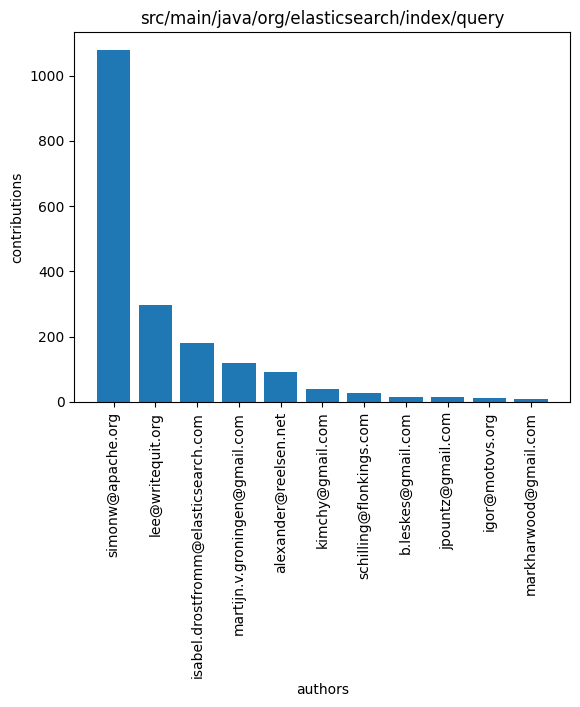

In [19]:
path = "src/main/java/org/elasticsearch/index/query"

packages_contributions = [
    {"email": k, "contributions": v}
    for (k, v) in get_author_modifications(path, Modification.TOTAL).items()
]

packages_contributions.sort(key=lambda x: x["contributions"], reverse=True)

plt.bar(
    [x["email"] for x in packages_contributions],
    [x["contributions"] for x in packages_contributions],
)
plt.title(path)
plt.tick_params("x", rotation=90)
plt.xlabel("authors")
plt.ylabel("contributions")
plt.show()

**Answer**

As we can see, the main contributor of this package has more than thousand contributions while the next contributor has about 300 contributions. Hence, the main contributor contributed about three times as much as the next one.

### Output Format for Visualization {-}

Example:

* `root` is always the root of the tree
* `size` should be the total number of lines of contribution
* `weight` can be set to the same as `size`
* `ownership` should be set to the percentage of contributions from the main author (e.g. 0.98 for 98% if contributions coming from the main author)

```
{
  "name": "root",
  "children": [
    {
      "name": "test",
      "children": [
        {
          "name": "benchmarking",
          "children": [
            {
              "author_color": "red",
              "size": "4005",
              "name": "t6726-patmat-analysis.scala",
              "weight": 1.0,
              "ownership": 0.9,
              "children": []
            },
            {
              "author_color": "red",
              "size": "55",
              "name": "TreeSetIterator.scala",
              "weight": 0.88,
              "ownership": 0.2,
              "children": []
            }
          ]
        }
      ]
    }
  ]
}
```

### JSON Export {-}

For exporting the data to JSON you can use the following snippet:

```
import json

with open("output.json", "w") as file:
    json.dump(tree, file, indent=4)
```

## Task 3: Code Churn Analysis {-}

The third and last task is to analyze the code churn of the _elasticsearch_ project. For this analysis we look at the code churn, meaning the daily change in the total number of lines of the project. Visualize the code churn over time bucketing the data by day. Remember that you'll need to interpolate the data for days when there are no commits. Chose an interpolation strategy and justify it.

In [20]:
daily_contribution_dict = {}

for commit in repo.traverse_commits():
    date = commit.committer_date.date()

    if date in daily_contribution_dict:
        daily_contribution_dict[date]["additions"] += commit.insertions
        daily_contribution_dict[date]["deletions"] += commit.deletions
    else:
        daily_contribution_dict[date] = {
            "additions": commit.insertions,
            "deletions": commit.deletions,
        }

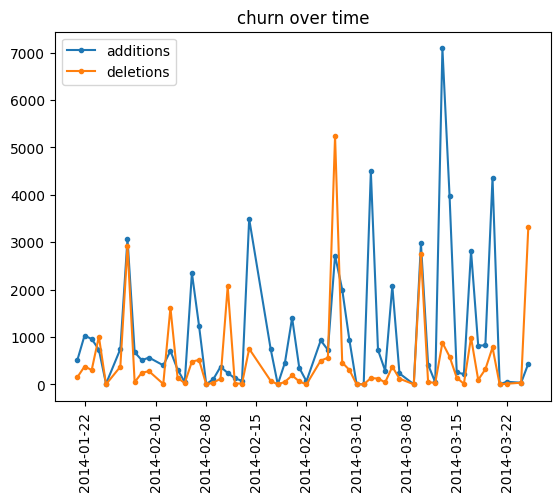

In [21]:
x_values = daily_contribution_dict.keys()
y_values_additions = [x["additions"] for x in daily_contribution_dict.values()]
y_values_deletions = [x["deletions"] for x in daily_contribution_dict.values()]

plt.plot(x_values, y_values_additions, marker=".", label="additions")
plt.plot(x_values, y_values_deletions, marker=".", label="deletions")
plt.legend()
plt.title("churn over time")
plt.tick_params("x", rotation=90)

Look at the churn trend over time and identify two outliers. For each of them:

- identify if it was caused by a single or multiple commits (since you are bucketing the data by day)
- find the hash of the involved commit(s)
- find the involved files
- look at the actual diff

Based on the above, discuss if the outlier is a false positive or should be a reason for concern.

**Answer:**

We decided for linear interpolation as we want to assume as little as possible. This works nice as the line does not drop to 0 on weekend or days with no contribution.

We decided for the following days:

* `2014-02-26`

In [22]:
daily_repo = Repository(
    repo_path,
    order="date-order",
    since=datetime(2014, 2, 26, 0, 0, 0, 0),
    to=datetime(2014, 2, 27, 0, 0, 0, 0),
)

for commit in daily_repo.traverse_commits():
    print(commit.hash[:8], commit.insertions, commit.deletions)
    if commit.insertions > 1000 or commit.deletions > 1000:
        print([x.new_path if x.new_path else x.old_path for x in commit.modified_files])
    print()

d25c14a9 9 9

bdced9c7 1 1

850b9d4a 35 5

e9674005 23 6

c2bb3981 0 21

90e57c15 1 1

54290199 119 16

0e780b7e 2184 1700
['src/main/java/org/elasticsearch/action/admin/indices/cache/clear/TransportClearIndicesCacheAction.java', 'src/main/java/org/elasticsearch/cache/recycler/PageCacheRecycler.java', 'src/main/java/org/elasticsearch/common/util/AbstractBigArray.java', 'src/main/java/org/elasticsearch/common/util/BigArrays.java', 'src/main/java/org/elasticsearch/common/util/BigFloatArray.java', 'src/main/java/org/elasticsearch/common/util/FloatArray.java', 'src/main/java/org/elasticsearch/index/cache/IndexCache.java', 'src/main/java/org/elasticsearch/index/cache/IndexCacheModule.java', 'src/main/java/org/elasticsearch/index/cache/id/IdCache.java', 'src/main/java/org/elasticsearch/index/cache/id/IdCacheModule.java', 'src/main/java/org/elasticsearch/index/cache/id/IdCacheStats.java', 'src/main/java/org/elasticsearch/index/cache/id/IdReaderCache.java', 'src/main/java/org/elasticsearch/ind

**Answer:**

From the diffs and the commit messages, we can see, that they changed the data structure and upgraded a dependency. As it spans over multiple files and impacts a diverse set of source code files, this should be a reason for concern and should not be a false positive.

* `2014-03-13`

In [23]:
daily_repo = Repository(
    repo_path,
    order="date-order",
    since=datetime(2014, 3, 13, 0, 0, 0, 0),
    to=datetime(2014, 3, 14, 0, 0, 0, 0),
)

for commit in daily_repo.traverse_commits():
    print(commit.hash[:8], commit.insertions, commit.deletions)
    if commit.insertions > 1000 or commit.deletions > 1000:
        print([x.new_path if x.new_path else x.old_path for x in commit.modified_files])
    print()

e7ddef99 9 8

77abf027 2 2

9fcee312 3 0

ca6a2bb7 21 21

669a7ec4 123 1

ca65a2ee 6 0

aecadfcc 19 29

81e537bd 3021 134
['docs/reference/search/suggesters.asciidoc', 'docs/reference/search/suggesters/completion-suggest.asciidoc', 'docs/reference/search/suggesters/context-suggest.asciidoc', 'src/main/java/org/apache/lucene/analysis/PrefixAnalyzer.java', 'src/main/java/org/apache/lucene/search/suggest/analyzing/XAnalyzingSuggester.java', 'src/main/java/org/apache/lucene/search/suggest/analyzing/XFuzzySuggester.java', 'src/main/java/org/elasticsearch/common/geo/GeoHashUtils.java', 'src/main/java/org/elasticsearch/common/geo/GeoPoint.java', 'src/main/java/org/elasticsearch/common/geo/GeohashPathIterator.java', 'src/main/java/org/elasticsearch/common/xcontent/XContentBuilder.java', 'src/main/java/org/elasticsearch/index/mapper/core/CompletionFieldMapper.java', 'src/main/java/org/elasticsearch/index/query/GeohashCellFilter.java', 'src/main/java/org/elasticsearch/search/suggest/SuggestBuild

**Answer:**

From the diffs and the commit messages, we can see, that even though there are a lot of changes in the documentation, as it spans over multiple files and impacts a diverse set of source code files, this should be a reason for concern and should not be a false positive.